#### 读入数据集

In [102]:
import pandas as pda
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
wine = pda.read_csv("G:\wine-reviews\winemag-data_first150k.csv",header=0,sep='',delimiter=",", encoding='utf-8')

 获取wine数据的列数以及shape

In [25]:
cols = wine.columns
shape = wine.shape
print(shape)
print(cols)

(150930, 11)
Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')


## 3.1 数据可视化和摘要

### 数据摘要

1、对称标属性，给出每个可能值的频数

In [51]:
pda.set_option('display.max_columns', None)#显示所有行
pda.set_option('display.max_rows', None)#显示所有列
groupname='country'
print(wine.groupby(by = groupname).size())
groupname='province'
print(wine.groupby(by = groupname).size())
groupname='region_1'
print(wine.groupby(by = groupname).size())
groupname='region_2'
print(wine.groupby(by = groupname).size())
groupname='variety'
print(wine.groupby(by = groupname).size())

country
Albania                       2
Argentina                  5631
Australia                  4957
Austria                    3057
Bosnia and Herzegovina        4
Brazil                       25
Bulgaria                     77
Canada                      196
Chile                      5816
China                         3
Croatia                      89
Cyprus                       31
Czech Republic                6
Egypt                         3
England                       9
France                    21098
Georgia                      43
Germany                    2452
Greece                      884
Hungary                     231
India                         8
Israel                      630
Italy                     23478
Japan                         2
Lebanon                      37
Lithuania                     8
Luxembourg                    9
Macedonia                    16
Mexico                       63
Moldova                      71
Montenegro                    2


2、数值属性，给出最大、最小、均值、中位数、四分位数及缺失值的个数

In [56]:
print("Points:")
print(wine['points'].describe())
print("The NULL value num:", wine['points'].isnull().sum())

print("Price:")
print(wine['price'].describe())
print("The NULL value num:", wine['price'].isnull().sum())

Points:
count    150930.000000
mean         87.888418
std           3.222392
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64
The NULL value num: 0
Price:
count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64
The NULL value num: 13695


### 数据可视化

1、绘制直方图，用qq图检验其分布是否为正态分布

（1）、对point属性列绘制直方图和qq图，从qq图中可以明显看出point属性列属于正态分布；
（2）、对price属性列绘制直方图和qq图，由于price中还有缺失值，所以正态分布的红线不显示，接着去除缺失值，再绘制qq图，从qq图上可以得知price属性值不属于正态分布。

Points:


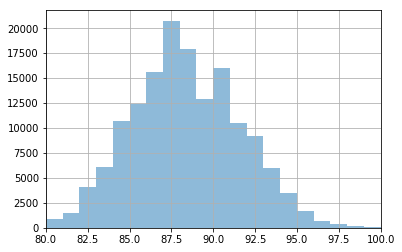

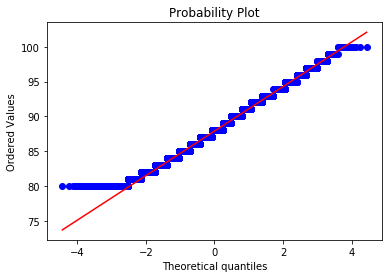

Price:


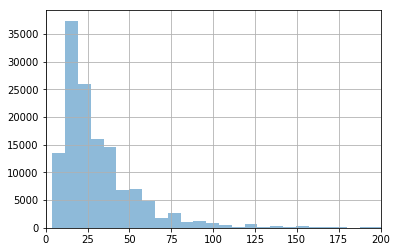

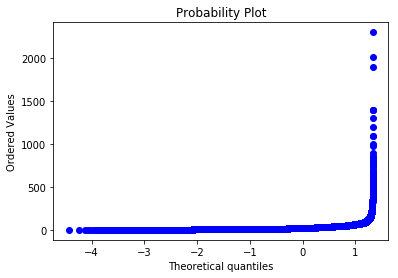

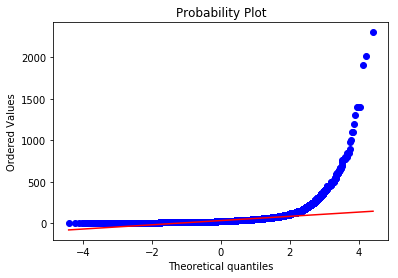

In [67]:
print("Points:")
#直方图绘制
plt.xlim(80,100)
wine['points'].hist(alpha=0.5,bins=20)
plt.show()
#qq图绘制
stats.probplot(wine['points'],dist="norm",plot=plt)
plt.show()

print("Price:")
#直方图绘制
plt.xlim(0,200)
wine['price'].hist(alpha=0.5,bins=300)
plt.show()
#qq图绘制
stats.probplot(wine['price'], dist="norm", plot=plt)
plt.show()
#去除缺失值再绘制qq图
data=pda.DataFrame(wine['price'])
data = data.dropna()
stats.probplot(data['price'], dist="norm", plot=plt)
plt.show()

2、绘制盒图，对离群值进行识别

（1）、通过对points属性列的盒图进行分析，发现离群点的个数不是很多；
（2）、通过对price属性列的盒图进行分析，发现离群点的个数非常多。

Points:


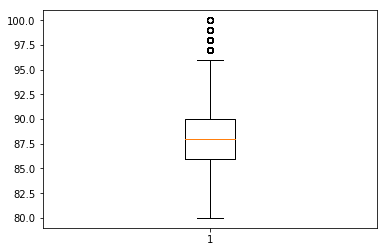

Price:


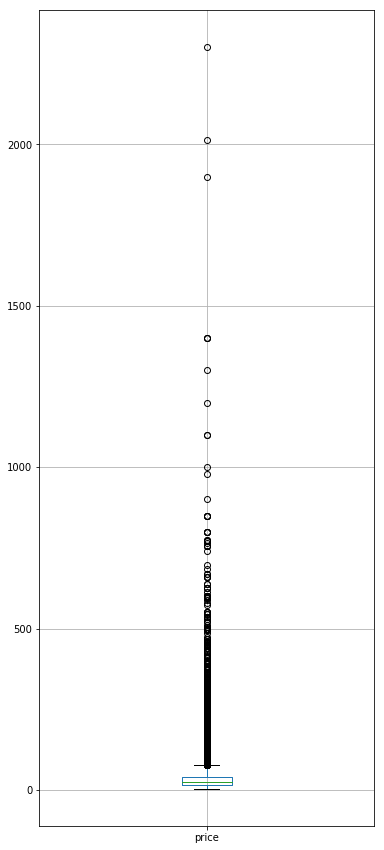

In [78]:
print("Points:")
#盒图绘制
plt.boxplot(x=wine['points'])
plt.show()
print("Price:")
#绘制盒图
data=pda.DataFrame(wine['price'])
data.boxplot(figsize=(6,15))
plt.show()

## 3.2 数据缺失的处理

1、观察数据集中缺失的数据，分析其缺失的原因

通过分析各个属性列缺失值的数量可以分析出：（1）、congtry属性列和province属性列缺失具有相关性，contry缺失时，province也必然缺失，但是整体上缺失量很少，所以缺失的原因应该是随机缺失；（2）、region1 和 region2很严重依赖于contry，contry缺失的同时，这两项也会缺失；(3)、region1缺失的同时，region2也会缺失；（4）、price的缺失很有可能是随机缺失。 

In [86]:
groupname='country'
print("The NULL value num of Country:", wine[groupname].isnull().sum())
groupname='province'
print("The NULL value num of Province:", wine[groupname].isnull().sum())
groupname='region_1'
print("The NULL value num of Region_1:", wine[groupname].isnull().sum())
groupname='region_2'
print("The NULL value num of Region_2:", wine[groupname].isnull().sum())
groupname='variety'
print("The NULL value num of Variety:", wine[groupname].isnull().sum())
groupname='points'
print("The NULL value num of Points:", wine[groupname].isnull().sum())
groupname='price'
print("The NULL value num of Price:", wine[groupname].isnull().sum())


The NULL value num of Country: 5
The NULL value num of Province: 5
The NULL value num of Region_1: 25060
The NULL value num of Region_2: 89977
The NULL value num of Variety: 0
The NULL value num of Points: 0
The NULL value num of Price: 13695


2、分别使用下列四种策略对缺失值进行处理:

（1）、将缺失部分剔除

               price
count  137235.000000
mean       33.131482
std        36.322536
min         4.000000
25%        16.000000
50%        24.000000
75%        40.000000
max      2300.000000
The NULL value num: price    0
dtype: int64


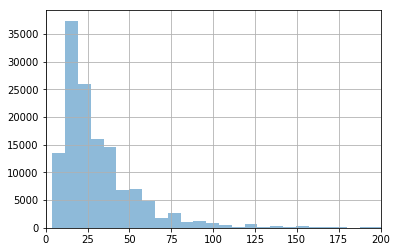

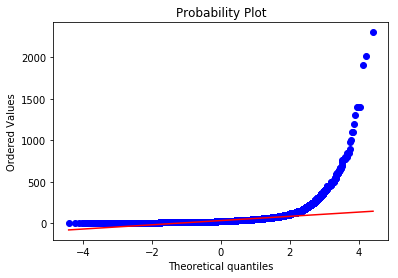

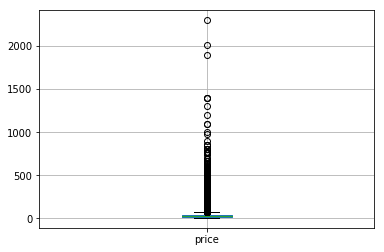

In [87]:
# price 去除缺失的数据
data=pda.DataFrame(wine['price'])
data = data.dropna()
print(data.describe())
print("The NULL value num:", data.isnull().sum())
plt.xlim(0,200)
data['price'].hist(alpha=0.5,bins=300).get_figure()
plt.show()
#qq图绘制
stats.probplot(data['price'], dist="norm", plot=plt)
plt.show()
#绘制盒图
data.boxplot()
plt.show()

In [ ]:
（2）、用最高频率值来填补缺失值

众数:
 0    20.0
dtype: float64
               price
count  150930.000000
mean       31.939966
std        34.840211
min         4.000000
25%        16.000000
50%        22.000000
75%        38.000000
max      2300.000000
The NULL value num: price    0
dtype: int64


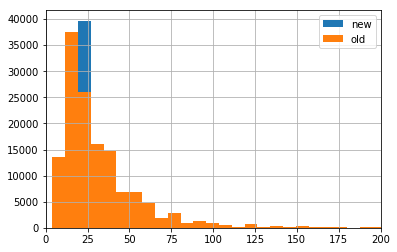

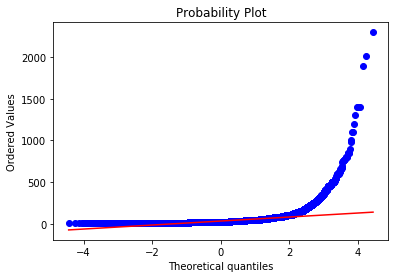

c:\users\double\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\double\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\double\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


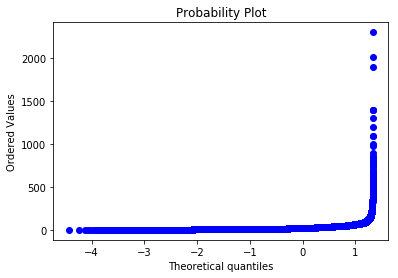

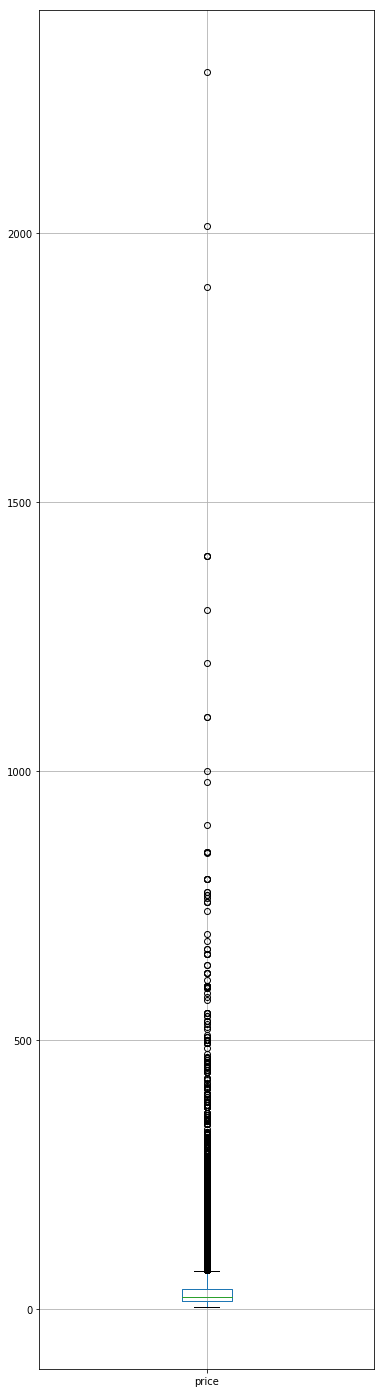

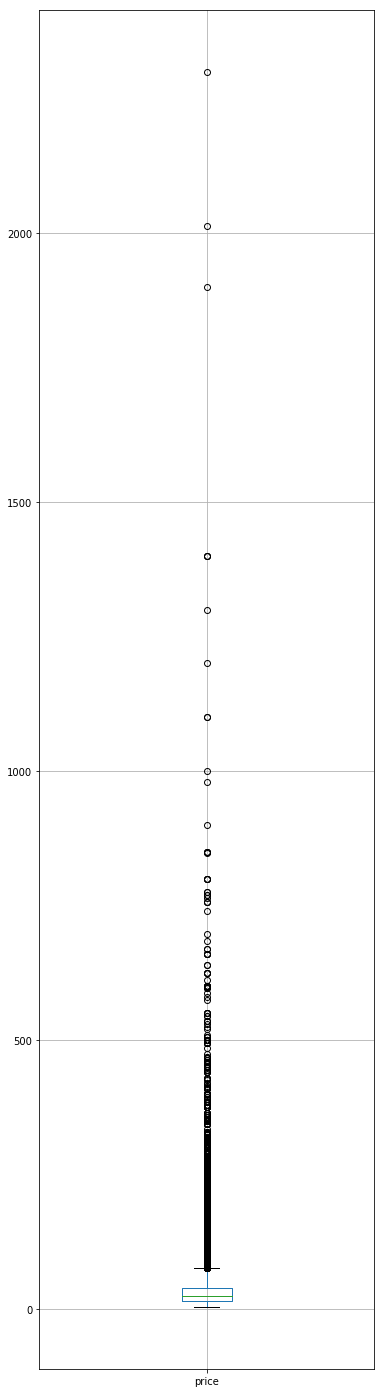

In [97]:
data_price=pda.DataFrame(wine,columns=['price'])
mode = data_price['price'].mode()
print("众数:\n",mode)
data_price2 = pda.DataFrame(wine,columns=['price'])
data_price2['price'].fillna(mode[0], inplace=True)

print(data_price2.describe())
print("The NULL value num:", data_price2.isnull().sum())
#绘制直方图
plt.xlim(0,200)
data_price2['price'].hist(bins=300)
data_price['price'].hist(bins=300)
plt.legend(['new','old'])
plt.show()
#qq图绘制
stats.probplot(data_price2['price'], dist="norm", plot=plt)
plt.show()
stats.probplot(data_price['price'], dist="norm", plot=plt)
plt.show()
#绘制盒图
data_price2.boxplot(figsize=(6,25))
plt.show()
data_price.boxplot(figsize=(6,25))
plt.show()

（3）、通过属性的相关关系来填补缺失值

In [103]:
linreg = LinearRegression()
data = wine.dropna(subset=['price'])
y = data[['price']]
data2 = wine[['price','points']]
RFR = RandomForestRegressor(random_state=0, n_estimators=50, n_jobs=-1)
known_price = data2[data2.price.notnull()].as_matrix()
unknown_price = data2[data2.price.isnull()].as_matrix()
y = known_price[:, :1]
X = known_price[:, 1:]
RFR.fit(X,y)
predictedprice = RFR.predict(unknown_price[:, 1:])
datasets = wine
datasets.loc[(datasets.price.isnull()),'price'] = predictedprice

c:\users\double\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
c:\users\double\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
c:\users\double\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


结果如下所示，从直方图可以看到，在很多数据段的数据均有所增加，但是数据段中心位置的区域预测的缺失值更多，这与我们用的回归方法和之前未缺失的数据分布有关，从数据的分布一致性来看，这样比采用众数的方法更好 QQ图的R=0.5063，更趋近于正态分布，这与预测方法相吻合 盒图未发现明显变化

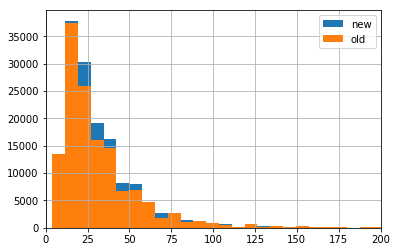

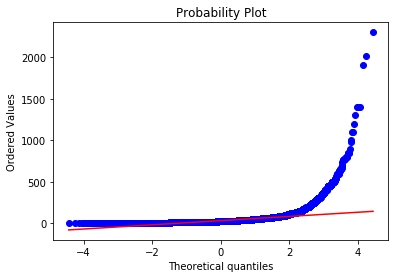

c:\users\double\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\double\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\double\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


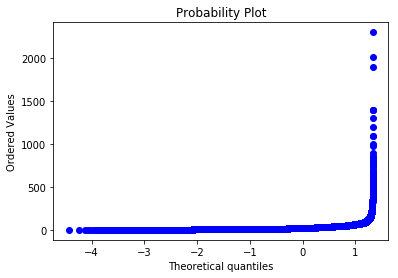

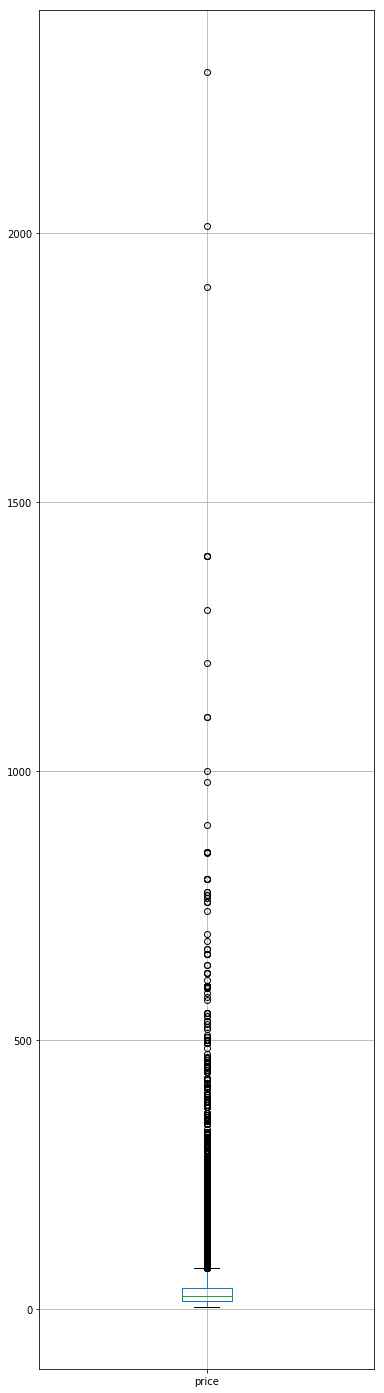

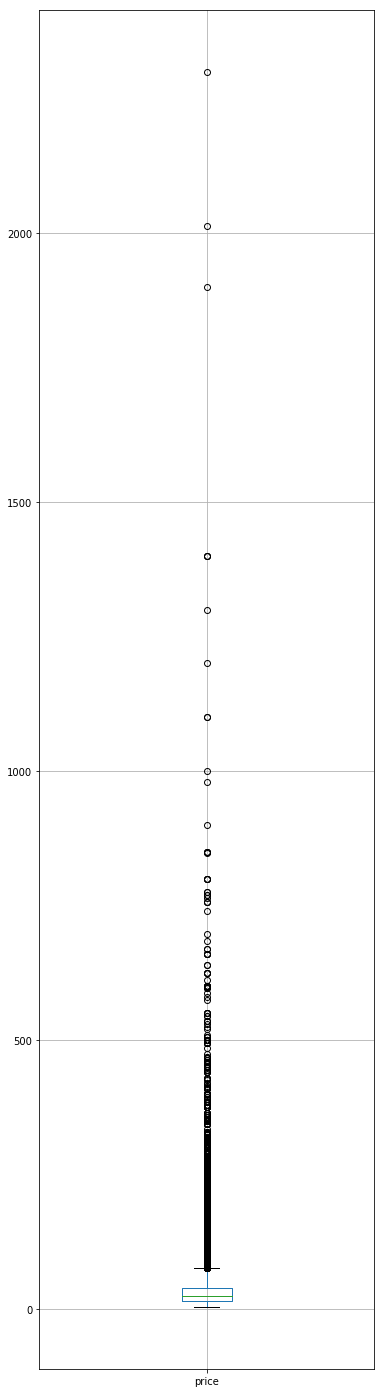

In [108]:
data_price3= pda.DataFrame(datasets,columns=['price'])
plt.xlim(0,200)
data_price3['price'].hist(bins=300)
data_price['price'].hist(bins=300)
plt.legend(['new','old'])
plt.show()
stats.probplot(data_price3['price'], dist="norm", plot=plt)
plt.show()
stats.probplot(data_price['price'], dist="norm", plot=plt)
plt.show()
data_price3.boxplot(figsize=(6,25))
plt.show()
data_price.boxplot(figsize=(6,25))
plt.show()

(4)、通过数据对象之间的相似性来填补缺失值

In [109]:
cty = wine[['country','price','points']]
ans1=cty.sort_values(["points","country"],inplace=False,ascending=True)
ans2=ans1
while len(ans1)!=len(ans1.dropna()):
    ans1=ans1.fillna(method="bfill")
ans11= ans1['price'].as_matrix()
while len(ans2)!=len(ans2.dropna()):
    ans2=ans2.fillna(method='ffill')
ans22= ans2['price'].as_matrix()
ans3=(ans22+ans11)/2

c:\users\double\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
c:\users\double\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


结果如下所示，从直方图可以看到，在很多数据段的数据均有所增加，但是数据段中心位置的区域预测的缺失值更多，也从一定程度上说明了位于中间段，即20-30的price的缺失值较多 QQ图的R=0.5062，更趋近于正态分布，与回归方法相似 盒图未发现明显变化

c:\users\double\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


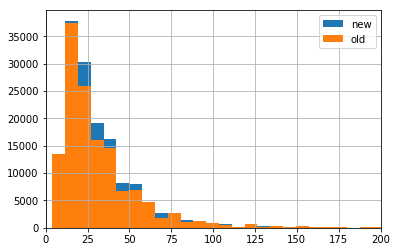

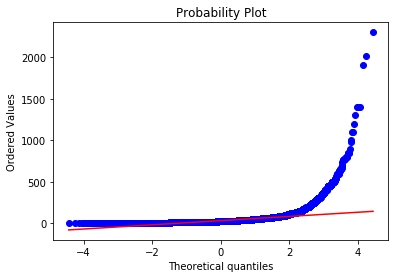

c:\users\double\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\double\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\double\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


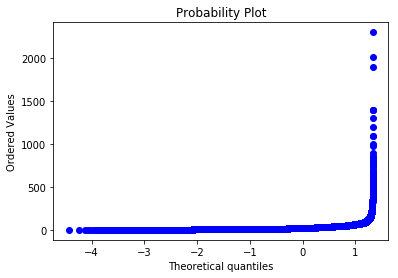

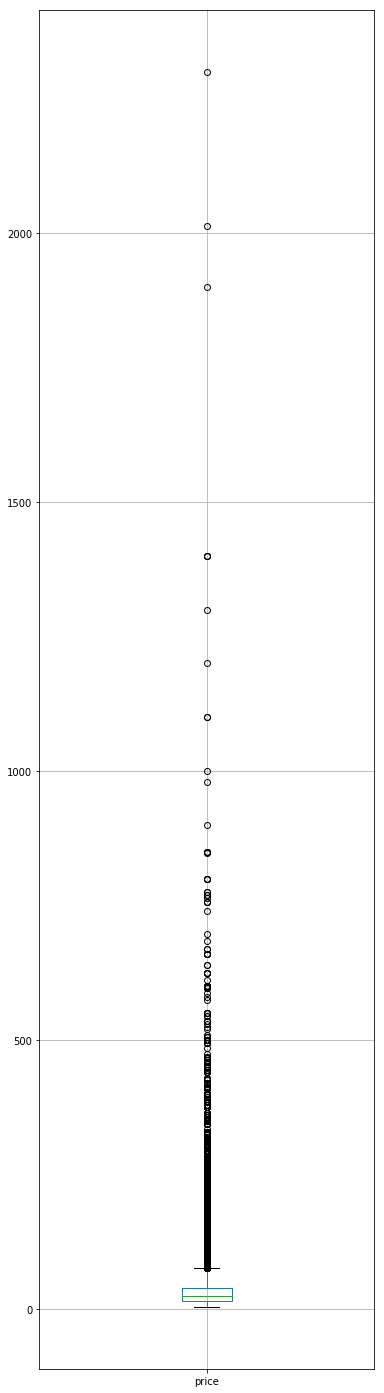

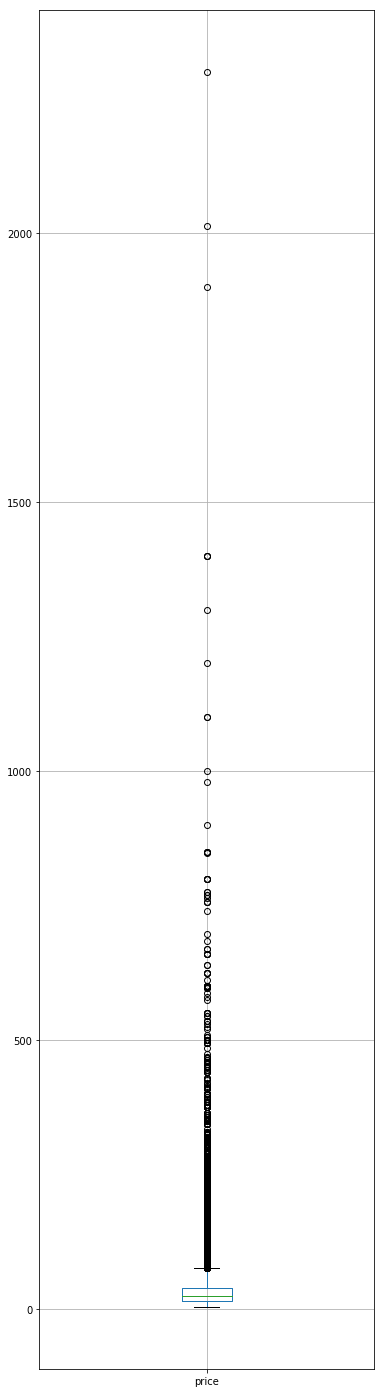

In [114]:
cty['price']=pda.DataFrame(ans3)
d=pda.DataFrame(cty,columns=['price'])
plt.xlim(0,200)
d['price'].hist(bins=300)
data_price['price'].hist(bins=300)
plt.legend(['new','old'])
plt.show()
stats.probplot(d['price'], dist="norm", plot=plt)
plt.show()
stats.probplot(data_price['price'], dist="norm", plot=plt)
plt.show()
d.boxplot(figsize=(6,25))
plt.show()
data_price.boxplot(figsize=(6,25))
plt.show()